In [1]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score, f1_score
from keras import backend as K
from feature_extractor.face_feature_extractor import FaceFeatureExtractor
import numpy as np
import cv2 as cv
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
import os
import time

Using TensorFlow backend.


In [2]:
DATA_DIR_PATH = '../exp_data/'
root_paths = []
file_paths = []
for root, dirs, files in os.walk(DATA_DIR_PATH):
     for file in files:
        root_paths.append(root)
        file_paths.append(os.path.join(root, file))

In [3]:
len(root_paths)

90

# Experiment

In [4]:
mtcnn_detector = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [5]:
feature_extractor = FaceFeatureExtractor(None, extractor_name='vgg_face_resnet50')

In [6]:
def extract_image_feature(face_detector, feature_extractor, file_path):
    img = cv.cvtColor(cv.imread(file_path), cv.COLOR_BGR2RGB)
    detection_result = face_detector.detect_faces(img)
    cropped_image = None
    feature = None
    for face in detection_result:
        face_bbox = face['box']
        x, y, w, h = face_bbox
        if x < 0:
            x = 0
        if y < 0:
            y = 0
        cropped_image = img[y:y+h, x:x+w]
        break
    if cropped_image is not None:
        feature = feature_extractor.extract_image(cropped_image)
    return feature

In [7]:
feature = extract_image_feature(mtcnn_detector, feature_extractor, file_paths[2])
print(feature)

None


In [8]:
diff_distances = []
same_distances = []
result_dict = {}
for i in range(len(root_paths) - 1):
    for j in range(i + 1, len(root_paths)):
        feature1 = extract_image_feature(mtcnn_detector, feature_extractor, file_paths[i])
        feature2 = extract_image_feature(mtcnn_detector, feature_extractor, file_paths[j])
        if feature1 is not None and feature2 is not None:
            distance = euclidean(feature1, feature2)
            if root_paths[i] != root_paths[j]:
                diff_distances.append(distance)
            else: #same
                same_distances.append(distance)
                
            result_dict[str(i) + ' ' + str(j)] = distance
        else:
            result_dict[str(i) + ' ' + str(j)] = None
    print('Checkpoint', i)

Checkpoint 0
Checkpoint 1
Checkpoint 2
Checkpoint 3
Checkpoint 4
Checkpoint 5
Checkpoint 6
Checkpoint 7
Checkpoint 8
Checkpoint 9
Checkpoint 10
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 30
Checkpoint 31
Checkpoint 32
Checkpoint 33
Checkpoint 34
Checkpoint 35
Checkpoint 36
Checkpoint 37
Checkpoint 38
Checkpoint 39
Checkpoint 40
Checkpoint 41
Checkpoint 42
Checkpoint 43
Checkpoint 44
Checkpoint 45
Checkpoint 46
Checkpoint 47
Checkpoint 48
Checkpoint 49
Checkpoint 50
Checkpoint 51
Checkpoint 52
Checkpoint 53
Checkpoint 54
Checkpoint 55
Checkpoint 56
Checkpoint 57
Checkpoint 58
Checkpoint 59
Checkpoint 60
Checkpoint 61
Checkpoint 62
Checkpoint 63
Checkpoint 64
Checkpoint 65
Checkpoint 66
Checkpoint 67
Checkpoint 68
Checkpoint 69
Checkpoint 70
Checkpoint 71
Ch

In [10]:
same_distances = sorted(same_distances)

In [11]:
diff_distances = sorted(diff_distances)

In [25]:
print(np.mean(same_distances))

73.67320671522549


In [16]:
print(np.mean(diff_distances))

126.54902474974588


In [38]:
print((np.mean(diff_distances) + np.mean(same_distances)) / 2)

100.11111573248569


# Distribution

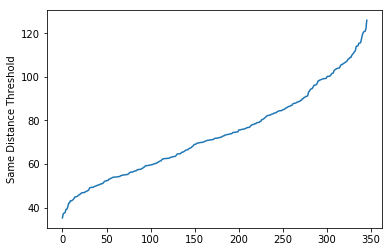

In [32]:
plt.plot(same_distances)
plt.ylabel('Same Distance Threshold')
plt.show()

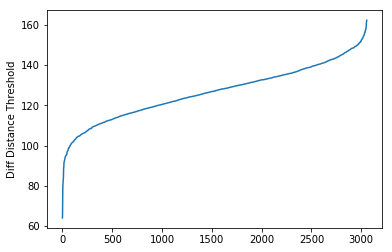

In [34]:
plt.plot(diff_distances)
plt.ylabel('Diff Distance Threshold')
plt.show()

In [37]:
diff_distances[:100]

[64.01384735107422,
 64.89225006103516,
 72.78427124023438,
 74.78607177734375,
 79.86282348632812,
 80.7822036743164,
 81.50426483154297,
 82.3405990600586,
 82.76815032958984,
 83.53199005126953,
 83.77978515625,
 88.14175415039062,
 88.85482788085938,
 88.88302612304688,
 89.45160675048828,
 91.37177276611328,
 91.56356048583984,
 91.87397766113281,
 91.87516784667969,
 92.1397476196289,
 92.67985534667969,
 92.78179931640625,
 92.97346496582031,
 93.08497619628906,
 93.5923080444336,
 93.73279571533203,
 93.93260192871094,
 93.9964828491211,
 94.17185974121094,
 94.32392120361328,
 94.60871887207031,
 94.61734008789062,
 94.64991760253906,
 94.92497253417969,
 94.9959945678711,
 95.12589263916016,
 95.12751007080078,
 95.1634292602539,
 95.23579406738281,
 95.3050537109375,
 95.43357849121094,
 95.4599380493164,
 95.46011352539062,
 95.46192932128906,
 95.64794158935547,
 96.19449615478516,
 96.29776000976562,
 96.78861236572266,
 96.94853973388672,
 97.02391052246094,
 97.12660980